# **Final Project : Financial Developement and Structure Research**

[List the project goal and details here] 

Overview of the data set: The data set contains:
* 10557 rows and 36 columns 
* coverage of 204 countries across XYZ region
* year XXXX to year 20YY, if applicable
* Topics such as bank concentration numbers, size of stock market as compared to GDP, xyz..

link to the data source: https://datacatalog.worldbank.org/dataset/wps2146-financial-development-and-structure

In [2]:
!pip install pandas
import pandas as pd
import matplotlib.pyplot as plt

# set the plots to display in the Jupyter notebook
%matplotlib inline
finData = pd.read_csv('Fin_Structure.csv') 

# To explore the details of this data set

In [0]:
finData.shape  #(10557,36)      
finData.columns    # prints out the list of column
unique_countries = pd.DataFrame(finData.groupby('COUNTRY').nunique()) # 2014 countries - To find out the number of unique countries

# Number of countries represented in each region

In [4]:
unique_countries = finData['COUNTRY'].unique()
unique_countries_df = pd.DataFrame(unique_countries)

# print(unique_countries_df)

unique_countries_by_region = pd.DataFrame(finData.groupby('WB REGION').COUNTRY.nunique())
unique_countries_by_region = unique_countries_by_region.drop(['region'])
unique_countries_by_region


,COUNTRY
WB REGION,
East Asia and Pacific,24
Europe and Central Asia,23
High-income OECD members,31
High-income nonOECD members,29
Latin America & the Caribbean,29
Middle East and North Africa,13
South Asia,8
Sub-Saharan Africa,46


#Graph of countries in each region (Question, how to add graph next to table)

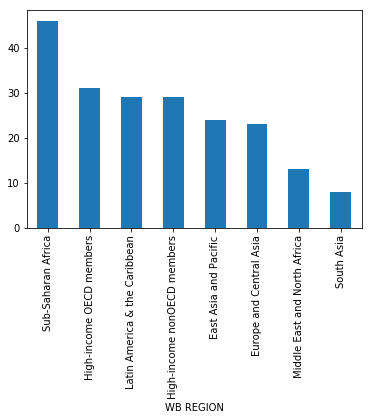

In [5]:
# Creating a bar graph to show numbers of country in each region, sorted in desc order
unique_countries_by_region['COUNTRY'].sort_values(ascending=False).plot(kind = 'bar');

# Narrowing down to East Asia and Pacific, here is the break down of country income groups (Question, how to move label out of the way)

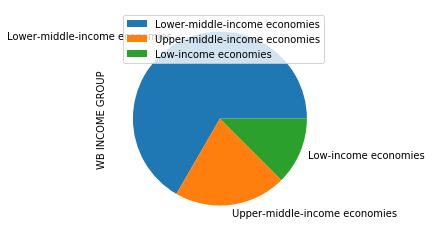

In [6]:

EAP = finData[finData['WB REGION'] == 'East Asia and Pacific']
EAP_INCOME_GROUP = EAP[["COUNTRY","WB INCOME GROUP"]]
EAP_INCOME_GROUP_UNIQUE = EAP_INCOME_GROUP.drop_duplicates()


count = EAP_INCOME_GROUP_UNIQUE["WB INCOME GROUP"].value_counts()
count
count_df = pd.DataFrame(count)
count_df
count_df.plot(kind = 'pie',y='WB INCOME GROUP')

# Question, how to multip plot

                               WB INCOME GROUP
Lower-middle-income economies               56
Upper-middle-income economies               52
Low-income economies                        35
High-income OECD members                    31
High-income nonOECD members                 29
                               WB INCOME GROUP
Lower-middle-income economies               56
Upper-middle-income economies               52
Low-income economies                        35
High-income OECD members                    31
High-income nonOECD members                 29
                               WB INCOME GROUP
Lower-middle-income economies               56
Upper-middle-income economies               52
Low-income economies                        35
High-income OECD members                    31
High-income nonOECD members                 29
                               WB INCOME GROUP
Lower-middle-income economies               56
Upper-middle-income economies               52
Low-income ec

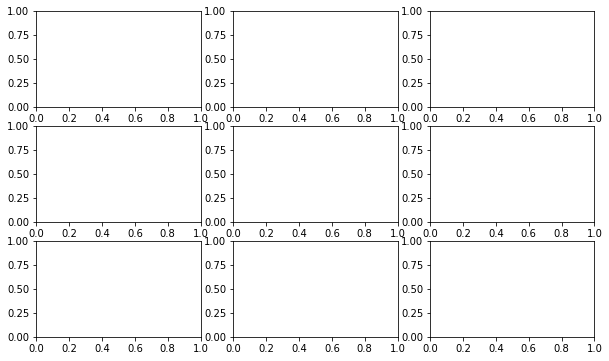

In [7]:
# EAP = finData[finData['WB REGION'] == 'East Asia and Pacific']
EAP_INCOME_GROUP = finData[["COUNTRY","WB REGION","WB INCOME GROUP"]]
EAP_INCOME_GROUP_UNIQUE = EAP_INCOME_GROUP.drop_duplicates().drop([0])
EAP_INCOME_GROUP_UNIQUE

# provides a list of unique region
Unique_Region = finData[["WB REGION"]].drop_duplicates().drop([0])
Unique_Region

# put a for loop here (For every country that is in this region - loop through list)
fig, axes = plt.subplots(3, 3, figsize=(10, 6))
  
for i, (idx, row) in enumerate(Unique_Region.set_index('WB REGION').iterrows()):
    ax = axes[i // 3, i % 3]
    count = EAP_INCOME_GROUP_UNIQUE["WB INCOME GROUP"].value_counts()
    count_df = pd.DataFrame(count)
    print(count_df)
#     ax.pie(row, labels=row.index, startangle=30)
#     ax.set_title(idx)

#fig.subplots_adjust(wspace=.3)    


# fig, axes = plt.subplots(2, 3, figsize=(10, 6))

# for i, (idx, row) in enumerate(df.set_index('Business').iterrows()):
#     ax = axes[i // 3, i % 3]
#     row = row[row.gt(row.sum() * .01)]
#     ax.pie(row, labels=row.index, startangle=30)
#     ax.set_title(idx)

# fig.subplots_adjust(wspace=.2)

#https://stackoverflow.com/questions/41787006/making-multiple-pie-charts-out-of-a-pandas-dataframe-one-for-each-row

# China's Central Bank Assets to GDP(%) YoY

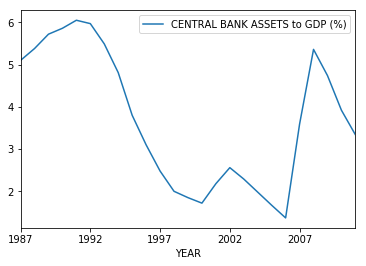

In [8]:
China = finData[finData['WB COUNTRY CODE'] == 'CHN']
CountryDeposit = pd.DataFrame(China[["YEAR","CENTRAL BANK ASSETS to GDP (%)"]])
# CountryDeposit = CountryDeposit.drop([1769])
CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"] = CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"].apply(lambda x: float(x))
CountryDeposit[CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"].notnull()].plot(kind = 'line',x="YEAR",y="CENTRAL BANK ASSETS to GDP (%)")


# United States Central Bank Assets to GDP (%)

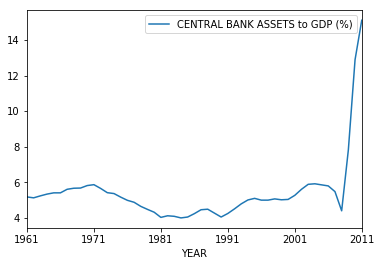

In [9]:
USA = finData[finData['WB COUNTRY CODE'] == 'USA']
CountryDeposit = pd.DataFrame(USA[["YEAR","CENTRAL BANK ASSETS to GDP (%)"]])
# CountryDeposit = CountryDeposit.drop([1769])
CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"] = CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"].apply(lambda x: float(x))
CountryDeposit[CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"].notnull()].plot(kind = 'line',x="YEAR",y="CENTRAL BANK ASSETS to GDP (%)")


United States central bank assets to GDP (%) spike in late 2010. This might be an effect of the financial crisis as banks are regulated to increase their capital ratio. 

In [0]:
USA = finData[finData['WB COUNTRY CODE'] == 'USA']
CountryDeposit = pd.DataFrame(USA[["YEAR","CENTRAL BANK ASSETS to GDP (%)"]])
# CountryDeposit = CountryDeposit.drop([1769])
CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"] = CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"].apply(lambda x: float(x))
CountryDeposit[CountryDeposit["CENTRAL BANK ASSETS to GDP (%)"].notnull()].plot(kind = 'line',x="YEAR",y="CENTRAL BANK ASSETS to GDP (%)")


# Comparing China's and USA Central Bank Assets to GDP, it shows the strength of US 

# BANK CONCENTRATION (USA, INDIA, CHINA)
Defination: Assets of three largest banks as a share of assets of all commercial banks.

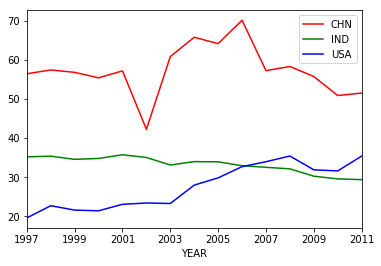

In [10]:
def plot_multi(country_codes):
  
  fig, ax = plt.subplots()
  for cc, color in country_codes:
    country = finData[finData['WB COUNTRY CODE'] == cc]
    BankConcentration = pd.DataFrame(country[["YEAR","BANK CONCENTRATION (%)"]])
    BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
    ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c=color, label=cc)

  plt.legend(loc='best')
  plt.show()

plot_multi([('CHN', 'red'), ('IND','green'), ('USA', 'blue')])

# China = finData[finData['WB COUNTRY CODE'] == 'CHN']
# BankConcentration = pd.DataFrame(China[["YEAR","BANK CONCENTRATION (%)"]])
# BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
# ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c='red', label='CHN')


# India = finData[finData['WB COUNTRY CODE'] == 'IND']
# BankConcentration = pd.DataFrame(India[["YEAR","BANK CONCENTRATION (%)"]])
# BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
# ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c='blue', label='IND')


# USA = finData[finData['WB COUNTRY CODE'] == 'USA']
# BankConcentration = pd.DataFrame(USA[["YEAR","BANK CONCENTRATION (%)"]])
# BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
# ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c='green', label='IND')

# plt.legend(loc='best')
# plt.show()

# BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(kind = 'line',x="YEAR",y="BANK CONCENTRATION (%)",title = "Bank Concentration")

# (Deep dive into Hong Kong 🇭🇰, Singapore 🇸🇬, and Japan 🇯🇵 )

This section could be analyzing the top three most developed countries in Asia 

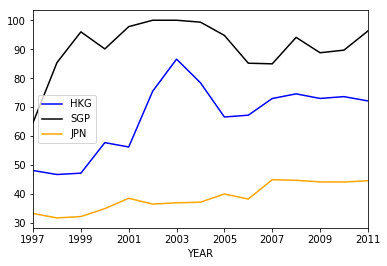

In [11]:

def plot_multi(country_codes):
  
  fig, ax = plt.subplots()
  for cc, color in country_codes:
    country = finData[finData['WB COUNTRY CODE'] == cc]
    BankConcentration = pd.DataFrame(country[["YEAR","BANK CONCENTRATION (%)"]])
    BankConcentration["BANK CONCENTRATION (%)"] = BankConcentration["BANK CONCENTRATION (%)"].apply(lambda x: float(x))
    ax = BankConcentration[BankConcentration["BANK CONCENTRATION (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='BANK CONCENTRATION (%)', c=color, label=cc)

  plt.legend(loc='best')
  plt.show()

plot_multi([('HKG', 'blue'), ('SGP', 'black'), ('JPN', 'orange')])


**Summary Analysis **

* The graph above is interesting because although Japan, Hong Kopng, and Singaprore are both developed country in Asia, there is a huge difference between the concentration of bank assets in those two countries.

*  Singapore has the highest concentration risk. With high % of assets in the top 3 banks, the financial interdependency and connectedness risk is high. 3 key players = harder for market entry

* On the other hand, Japanese banking market is scatter and there are more institutions. No major player. Good opportunity for Neobanks and banking startups.


# Consumer Savings Habit

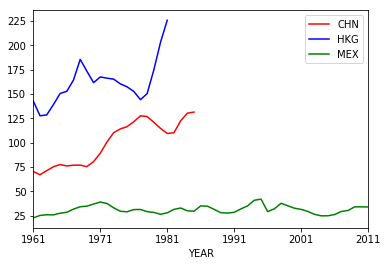

In [12]:
def plot_multi(country_codes):
  
  fig, ax = plt.subplots()
  for cc, color in country_codes:
    country = finData[finData['WB COUNTRY CODE'] == cc]
    BankConcentration = pd.DataFrame(country[["YEAR","DEPOSIT MONEY BANK ASSETS to GDP (%)"]])
    BankConcentration["DEPOSIT MONEY BANK ASSETS to GDP (%)"] = BankConcentration["DEPOSIT MONEY BANK ASSETS to GDP (%)"].apply(lambda x: float(x))
    ax = BankConcentration[BankConcentration["DEPOSIT MONEY BANK ASSETS to GDP (%)"].notnull()].plot(ax=ax, kind='line', x='YEAR', y='DEPOSIT MONEY BANK ASSETS to GDP (%)', c=color, label=cc)

  plt.legend(loc='best')
  plt.show()

plot_multi([('CHN', 'red'), ('HKG', 'blue'),('MEX','green')])


### I think data year is messed up here ^

*Summary Analysis *

DEPOSIT MONEY BANK ASSETS to GDP (%) shows consumer behaviour in different culture. 

Higher deopsit ratio shows country where consumer prefers to save vs. spend.

# Find the top three largest & smallest stock market to GDP

I think this is a better metrics than just relative size of stock market, beacuse it will just be the top countries. This takes into account of the countries that the country GDP, discounting country that has large GDP (dividing by denominator)

'STOCK MARKET TOTAL VALUE TRADED to GDP (%)''

1. Pick only year 2011 for all countries. 
2. Sort descending / ascending
3. Plot it out

Find the smalles - most undeveloped stocked market


**Next step... **

* drop null values
* select columns that I want to analyze
* For trends that I am interested in, can do a time series analysis
* for across country comparison, just use one year


